# Figure 1: compare cloud-radiative impact in ICON2.1 diagnosed by methods of Schäfer and Voigt (2018) and Keshtgar et al. (2023)

In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

import sys; sys.path.append("../helperfuncs")
from myfunctions import domainmean, eke, corepressure, load_data_cyclonemetrics, beautify_timeseries

## Load data.

In [2]:
# ICON2.1
i21_no = load_data_cyclonemetrics(expid="i2100-0002", chunks="auto") # no radiation
i21_as = load_data_cyclonemetrics(expid="i2100-0001", chunks="auto") # all-sky radiation
i21_cs = load_data_cyclonemetrics(expid="i2100-0003", chunks="auto") # clear-sky radiation
i21_ch = load_data_cyclonemetrics(expid="i2100-0004", chunks="auto") # only cloud-radiative heating

In [3]:
# time information in units of days
time = np.arange(0,i21_no.time.size/4,0.25)

## Make plot.

In [4]:
def restrictlat(data):
    return data.sel(lat=slice(75,25))

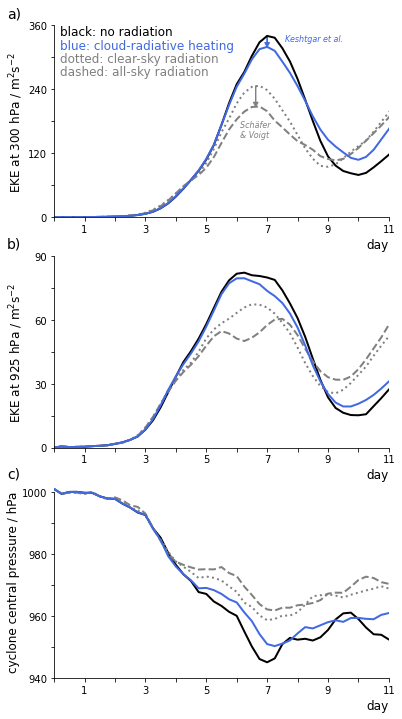

In [5]:
lw=2 # linewidth

plt.figure(figsize=(6,12))

ax=plt.subplot(3,1,1)
plt.plot(time, domainmean(restrictlat(eke(i21_no).sel(lev=300e2))), color="k", linestyle="-", label="no radiation", linewidth=lw)
plt.plot(time, domainmean(restrictlat(eke(i21_as).sel(lev=300e2))), color="gray", linestyle="--", label="all-sky radiation", linewidth=lw)
plt.plot(time, domainmean(restrictlat(eke(i21_cs).sel(lev=300e2))), color="gray", linestyle=":", label="clear-sky radiation", linewidth=lw)
plt.plot(time, domainmean(restrictlat(eke(i21_ch).sel(lev=300e2))), color="royalblue", linestyle="-", label="cloud-radiative heating only", linewidth=lw)
beautify_timeseries(ax)
plt.ylabel(r"EKE at 300 hPa / m$^{2}$s$^{-2}$", size=12, ha="center", va="top")
ax.yaxis.set_label_coords(-0.14, 0.5)
plt.ylim(0,360)
plt.yticks([0,60,120,180,240,300,360],[0,"",120,"",240,"",360], size=10);
ax.text(-0.14,1.1, "a)", ha="left", va="top", transform=ax.transAxes, size=14)
plt.text(0.2, 360, "black: no radiation", color="k", size=12, ha="left", va="top")
plt.text(0.2, 335, "blue: cloud-radiative heating", color="royalblue", size=12, ha="left", va="top")
plt.text(0.2, 310, "dotted: clear-sky radiation", color="gray", size=12, va="top")
plt.text(0.2, 285, "dashed: all-sky radiation", color="gray", size=12, va="top")
plt.arrow(time[28],340, 0, -20, head_width=0.16, head_length=8, length_includes_head=True, color="royalblue")
plt.arrow(time[26]+0.125,247, 0, -39, head_width=0.16, head_length=8, length_includes_head=True, color="gray")
plt.text(7.6, 330, "Keshtgar et al.", size=8, color="royalblue", fontstyle="italic")
plt.text(6.1, 150, "Schäfer \n& Voigt", size=8, color="gray", fontstyle="italic")

# EKE at 925 hPa
ax=plt.subplot(3,1,2)
plt.plot(time, domainmean(restrictlat(eke(i21_no).sel(lev=925e2))), color="k", linestyle="-", label="no radiation", linewidth=lw)
plt.plot(time, domainmean(restrictlat(eke(i21_as).sel(lev=925e2))), color="gray", linestyle="--", label="all-sky radiation", linewidth=lw)
plt.plot(time, domainmean(restrictlat(eke(i21_cs).sel(lev=925e2))), color="gray", linestyle=":", label="clear-sky radiation", linewidth=lw)
plt.plot(time, domainmean(restrictlat(eke(i21_ch).sel(lev=925e2))), color="royalblue", linestyle="-", label="cloud-radiative heating only", linewidth=lw)
beautify_timeseries(ax)
plt.ylabel(r"EKE at 925 hPa / m$^{2}$s$^{-2}$", size=12, ha="center", va="top")
ax.yaxis.set_label_coords(-0.14, 0.5)
plt.ylim(0,90)
plt.yticks([0,15,30,45,60,75,90],[0,"",30,"",60,"",90], size=10);
ax.text(-0.14,1.1, "b)", ha="left", va="top", transform=ax.transAxes, size=14)

# core pressure
ax=plt.subplot(3,1,3)
plt.plot(time, 1e-2*corepressure(restrictlat(i21_no),meancyclone=True), color="k", linestyle="-", label="no radiation", linewidth=lw)
plt.plot(time, 1e-2*corepressure(restrictlat(i21_as),meancyclone=True), color="gray", linestyle="--", label="all-sky radiation", linewidth=lw)
plt.plot(time, 1e-2*corepressure(restrictlat(i21_cs),meancyclone=True), color="gray", linestyle=":", label="clear-sky radiation", linewidth=lw)
plt.plot(time, 1e-2*corepressure(restrictlat(i21_ch),meancyclone=True), color="royalblue", linestyle="-", label="cloud-radiative heating only", linewidth=lw)
beautify_timeseries(ax)
plt.ylabel("cyclone central pressure / hPa", size=12, ha="center", va="top")
ax.yaxis.set_label_coords(-0.14, 0.5)
ax.spines['bottom'].set_position(('data',940))
plt.ylim(940,1002)
ax.spines['left'].set_bounds(940,1000)
plt.yticks([940,950,960,970,980,990,1000],[940,"",960,"",980,"",1000], size=10);
ax.text(-0.14,1.1, "c)", ha="left", va="top", transform=ax.transAxes, size=14)

plt.savefig("figure_1.pdf")